In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

from scipy.spatial import ConvexHull

In [2]:
np.set_printoptions(threshold=sys.maxsize)

figure_size = 5
plt.rcParams["figure.figsize"] = (figure_size, figure_size)

## Constants

In [3]:
x_interval = [-1, 1]
y_interval = [-1, 1]

step_interval = 100

In [4]:
alpha = 0.5
epsilon = 10e-5

## Utilities

In [5]:
'''
t – array of measure points
alpha – given constant

Returns an array of averaged zeroes of the function
'''
def average_zero(t, alpha):    
    result = np.empty(shape=(0,2), dtype=float)

    for i in range(0, len(t)):
        
        zero = np.empty(shape=(2), dtype=float)

        zero[0] = t[i, 0] * alpha
        zero[1] = t[i, 1] * alpha
        
        result = np.append(result, [zero], axis=0)
        
    return result

'''
vectors – an array of vectors
t – array of measure points
alpha – given constant

Returns an array of averaged vectors on which
 the function if given
'''
def average_vectors(vectors, t, alpha):
    vectors_count = len(vectors)
    
    result = np.empty(shape=(0,vectors_count,2), dtype=float)

    for i in range(0, len(t)):
        
        averaged_vectors = np.empty(shape=(0,2), dtype=float)

        for j in range(0, vectors_count):
            averaged_vector = np.empty(shape=(2), dtype=float)

            averaged_vector[0] = vectors[j, 0] + t[i, 0] * alpha
            averaged_vector[1] = vectors[j, 1] + t[i, 1] * alpha

            averaged_vectors = np.append(averaged_vectors, [averaged_vector], axis=0)
        
        result = np.append(result, [averaged_vectors], axis=0)
        
    return result

In [6]:
'''
Returns a list of rays intersections if any

line1 – array with a start and an end of the line
        that respresents the first ray
line2 – array with a start and an end of the line
        that respresents the second ray
'''
def find_intersection_of_rays(line1, line2):
    
    if np.array_equal(line1[0], line2[1]):
        return line1[0]
    
    elif np.array_equal(line2[0], line1[1]):
        return line2[0]
    
    result = np.empty(shape=(2), dtype=float)
    
    v1 = [line1[1][0] - line1[0][0], line1[1][1] - line1[0][1]]
    v2 = [line2[1][0] - line2[0][0], line2[1][1] - line2[0][1]]
    
    l1 = np.sqrt(v1[1]**2 + v1[0]**2)
    l2 = np.sqrt(v2[1]**2 + v2[0]**2)
    
    n1 = [v1[0] / l1, v1[1] / l1]
    n2 = [v2[0] / l2, v2[1] / l2]
    
    dx = line2[0][0] - line1[0][0]
    dy = line2[0][1] - line1[0][1]
    
    det = n2[0] * n1[1] - n1[0] * n2[1]

    if det != 0:
        u = (dy * n2[0] - dx * n2[1]) / det
        v = (dy * n1[0] - dx * n1[1]) / det
        
        if u >= 0 and v >= 0:
            if n1[0] == 0 or n2[0] == 0:
                m0 = n1[1] / (n1[0] + epsilon)
                m1 = n2[1] / (n2[0] + epsilon)
            else:
                m0 = n1[1] / n1[0]
                m1 = n2[1] / n2[0]
            
            b0 = line1[0][1] - m0 * line1[0][0]
            b1 = line2[0][1] - m1 * line2[0][0]
            
            #if b0 == 0 and b1 == 0:
            #    return
            
            x = (b1 - b0) / (m0 - m1)
            y = m0 * x + b0
            
            result = [x, y]
            
            return result
            print(result)

## Main

### Initial function

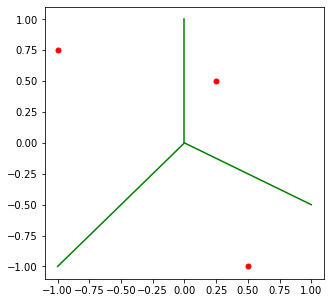

In [7]:
initial_vectors = np.array([[0, 1], [1, -0.5], [-1, -1]]) # asymmetric
#initial_vectors = np.array([[0, 1], [1, -0.5], [-1, -0.5]]) # symmetric
#initial_vectors = np.array([[0, 1], [0.5, -1], [-0.5, -1]]) # symmetric
#initial_vectors = np.array([[0, 1], [1, -1], [-1, -1]]) # symmetric
#initial_vectors = np.array([[1, 0], [-1, -1], [-1, 1]])

#initial_vectors = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]]) #symmetric
#initial_vectors = np.array([[0, 1], [1, 0], [0.5, -1], [-1, 0.5]])
#initial_vectors = np.array([[0, 1], [1, 0], [0.5, -1], [-1, 0.5]])
#initial_vectors = np.array([[-1, 1], [1, 0.5], [0.5, -1], [-1, 0]])

#t = np.array([[1, 1], [1, -1], [-1, -1], [-1, 1]])
#t = np.array([[1, 1], [1, -1], [0, -1], [-1, 0.5]])

#t = np.array([[1, 1], [1, -1], [-1, 0]])
t = np.array([[0.25, 0.5], [0.5, -1], [-1, 0.75]])
#t = np.array([[1, 0.5], [-1, 1], [0, -1]])
p = np.array([1/3, 1/3, 1/3])

averaged_vectors = average_vectors(initial_vectors, t, alpha)
averaged_zero = average_zero(t, alpha)

for i in range(0, len(initial_vectors)):
    x_values = [0, initial_vectors[i, 0]]
    y_values = [0, initial_vectors[i, 1]]

    plt.plot(x_values, y_values, color='green')

for i in range(0, len(t)):
    plt.plot(t[i, 0], t[i, 1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")

### Find avegarings

In [8]:
points = np.empty(shape=(0,2), dtype=float)

for l in range(0, len(averaged_zero)):
    #print('--l =', l, '(measure points)')
    start1 = averaged_zero[l]
    end1_list = averaged_vectors[l]

    for i in range(0, len(initial_vectors)):
        #print('   --i =', i, '(vectors count)')
        end1 = end1_list[i]

        for j in range(l + 1, len(t)):
            #print('    --j =', j, '(other measure points)')
            start2 = averaged_zero[j]
            end2_list = averaged_vectors[j]

            for k in range(0, len(initial_vectors)):
                #print('     --k =', k, '(vectors count)')
                end2 = end2_list[k]

                point = find_intersection_of_rays([start1, end1], [start2, end2])

                if point is not None and not np.isnan(point).any():
                    points = np.append(points, [point], axis=0)

### Plot intersection in a convex hull

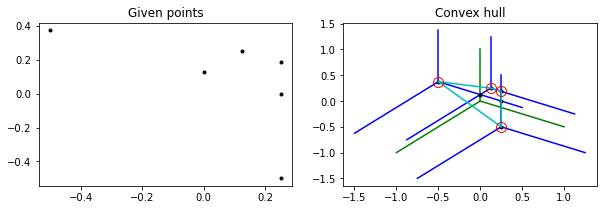

intersection count = 3


In [9]:
convexFigure = np.concatenate((points, averaged_zero))

hull = ConvexHull(convexFigure)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

for i in range(0, len(initial_vectors)):
    x_values = [0, initial_vectors[i, 0]]
    y_values = [0, initial_vectors[i, 1]]

    plt.plot(x_values, y_values, color='green')
    
x_values = [averaged_zero[0, 0], averaged_vectors[0, 2, 0]]
y_values = [averaged_zero[0, 1], averaged_vectors[0, 2, 1]]
    
for i in range(0, len(averaged_vectors)):
    for j in range(0, len(averaged_vectors[i])):
        x_values = [averaged_zero[i, 0], averaged_vectors[i, j, 0]]
        y_values = [averaged_zero[i, 1], averaged_vectors[i, j, 1]]

        plt.plot(x_values, y_values, color='blue')
    
for ax in (ax1, ax2):
    ax.plot(convexFigure[:, 0], convexFigure[:, 1], '.', color='k')
    
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        
        for simplex in hull.simplices:
            ax.plot(convexFigure[simplex, 0], convexFigure[simplex, 1], 'c')
            
        ax.plot(convexFigure[hull.vertices, 0], convexFigure[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)

plt.show()

print('intersection count =', len(points))
